### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [7]:
min_qubits=6
max_qubits=18
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre',
#                  "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these lines when running on hardware backend, to limit use of resources
# min_qubits=2
# max_qubits=5
# max_circuits=1
# num_shots=100

# An example using BlueQubit provider
import os, bluequbit
provider_backend = bluequbit.init(os.environ.get('BLUEQUBIT_API_TOKEN'))
backend_id="BlueQubit-CPU"
os.environ.get('AQT_ACCESS_KEY')
import types
def bq_name(backend):
    return backend_id

provider_backend.name = types.MethodType( bq_name, provider_backend )

import _common.executors.bluequbit_executor as bluequbit_executor
exec_options = { "executor": bluequbit_executor.run }



BQ-PYTHON-SDK - WARNING - Development version 0.2.2b1 of BlueQubit Python SDK is being used


In [ ]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre',
#                         "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) }

# Example of a custom Executor (BlueQubit)
import _common.executors.bluequbit_executor as bluequbit_executor
exec_options = { "executor": bluequbit_executor.run }


### Deutsch-Jozsa

In [ ]:
import sys
sys.path.insert(1, "deutsch-jozsa/qiskit")
import dj_benchmark
dj_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 1

Bernstein-Vazirani Benchmark Program - Qiskit
... execution starting at Aug 08, 2023 05:29:07 UTC
************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 3zXZQmrQhjac0xMg, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:06 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: 3zXZQmrQhjac0xMg, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:06 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 6, 0.067
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 6, 0.043, 1.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.001, 0.377, 0.005 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 7


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 20hcPS0zBiWp6gjp, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:07 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7
INFO:bluequbit-python-sdk:Submitted: Job ID: 20hcPS0zBiWp6gjp, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:07 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7


************
Average Circuit Algorithmic Depth, ξ (xi) for the 7 qubit group = 9, 0.2
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 7 qubit group = 9, 0.133, 4.0
Average Creation, Elapsed, Execution Time for the 7 qubit group = 0.001, 0.407, 0.006 secs
Average Hellinger, Normalized Fidelity for the 7 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: KfBrilA9WQ3rE3oB, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:07 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: KfBrilA9WQ3rE3oB, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:07 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 11, 0.25
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 11, 0.167, 6.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.001, 0.374, 0.007 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 9


BQ-PYTHON-SDK - INFO - Submitted: Job ID: VKoYCmEEP3CDJ2uB, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:08 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 9
INFO:bluequbit-python-sdk:Submitted: Job ID: VKoYCmEEP3CDJ2uB, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:08 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 9


************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 8, 0.13
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 8, 0.081, 3.0
Average Creation, Elapsed, Execution Time for the 9 qubit group = 0.001, 0.499, 0.007 secs
Average Hellinger, Normalized Fidelity for the 9 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10


BQ-PYTHON-SDK - INFO - Submitted: Job ID: sxfQ7LpRPps2v58v, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:08 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 10
INFO:bluequbit-python-sdk:Submitted: Job ID: sxfQ7LpRPps2v58v, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:08 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 10


************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 8, 0.12
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 8, 0.073, 3.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.001, 0.391, 0.008 secs
Average Hellinger, Normalized Fidelity for the 10 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 11


BQ-PYTHON-SDK - INFO - Submitted: Job ID: a0xMmL1tLQCLnEjt, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:09 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 11
INFO:bluequbit-python-sdk:Submitted: Job ID: a0xMmL1tLQCLnEjt, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:09 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 11


************
Average Circuit Algorithmic Depth, ξ (xi) for the 11 qubit group = 8, 0.111
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 11 qubit group = 8, 0.067, 3.0
Average Creation, Elapsed, Execution Time for the 11 qubit group = 0.001, 0.401, 0.008 secs
Average Hellinger, Normalized Fidelity for the 11 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 12


BQ-PYTHON-SDK - INFO - Submitted: Job ID: IKs5XBBugDszK75N, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:09 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 12
INFO:bluequbit-python-sdk:Submitted: Job ID: IKs5XBBugDszK75N, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:09 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 12


************
Average Circuit Algorithmic Depth, ξ (xi) for the 12 qubit group = 9, 0.133
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 12 qubit group = 9, 0.08, 4.0
Average Creation, Elapsed, Execution Time for the 12 qubit group = 0.003, 0.408, 0.009 secs
Average Hellinger, Normalized Fidelity for the 12 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 13


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 94qGdDw3PVWJILxN, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:09 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 13
INFO:bluequbit-python-sdk:Submitted: Job ID: 94qGdDw3PVWJILxN, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:09 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 13


************
Average Circuit Algorithmic Depth, ξ (xi) for the 13 qubit group = 12, 0.2
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 13 qubit group = 12, 0.123, 7.0
Average Creation, Elapsed, Execution Time for the 13 qubit group = 0.004, 0.426, 0.01 secs
Average Hellinger, Normalized Fidelity for the 13 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 14


BQ-PYTHON-SDK - INFO - Submitted: Job ID: oNJv4jZz9MdzU3bH, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 14
INFO:bluequbit-python-sdk:Submitted: Job ID: oNJv4jZz9MdzU3bH, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 14


************
Average Circuit Algorithmic Depth, ξ (xi) for the 14 qubit group = 11, 0.167
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 14 qubit group = 11, 0.1, 6.0
Average Creation, Elapsed, Execution Time for the 14 qubit group = 0.002, 1.541, 0.011 secs
Average Hellinger, Normalized Fidelity for the 14 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 15


BQ-PYTHON-SDK - INFO - Submitted: Job ID: BGZuCkIZpgjz0fZO, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:11 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 15
INFO:bluequbit-python-sdk:Submitted: Job ID: BGZuCkIZpgjz0fZO, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:11 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 15


************
Average Circuit Algorithmic Depth, ξ (xi) for the 15 qubit group = 13, 0.2
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 15 qubit group = 13, 0.121, 8.0
Average Creation, Elapsed, Execution Time for the 15 qubit group = 0.001, 1.859, 0.012 secs
Average Hellinger, Normalized Fidelity for the 15 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 16


BQ-PYTHON-SDK - INFO - Submitted: Job ID: raha6vU4emAEGRGj, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:13 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 16
INFO:bluequbit-python-sdk:Submitted: Job ID: raha6vU4emAEGRGj, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:13 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 16


************
Average Circuit Algorithmic Depth, ξ (xi) for the 16 qubit group = 14, 0.209
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 16 qubit group = 14, 0.127, 9.0
Average Creation, Elapsed, Execution Time for the 16 qubit group = 0.002, 1.604, 0.015 secs
Average Hellinger, Normalized Fidelity for the 16 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 17


BQ-PYTHON-SDK - INFO - Submitted: Job ID: g0QEEf1XMXFt6TzG, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:15 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 17
INFO:bluequbit-python-sdk:Submitted: Job ID: g0QEEf1XMXFt6TzG, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:15 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 17


************
Average Circuit Algorithmic Depth, ξ (xi) for the 17 qubit group = 12, 0.163
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 17 qubit group = 12, 0.096, 7.0
Average Creation, Elapsed, Execution Time for the 17 qubit group = 0.002, 0.464, 0.015 secs
Average Hellinger, Normalized Fidelity for the 17 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 18


BQ-PYTHON-SDK - INFO - Submitted: Job ID: Wa9DOv6II4NuQ4h1, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:16 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 18
INFO:bluequbit-python-sdk:Submitted: Job ID: Wa9DOv6II4NuQ4h1, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:16 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 18


************
Average Circuit Algorithmic Depth, ξ (xi) for the 18 qubit group = 14, 0.191
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 18 qubit group = 14, 0.114, 9.0
Average Creation, Elapsed, Execution Time for the 18 qubit group = 0.001, 0.456, 0.02 secs
Average Hellinger, Normalized Fidelity for the 18 qubit group = 1.0, 1.0

... execution complete at Aug 08, 2023 05:29:17 UTC in 9.436 secs

Sample Circuit:
        ┌───┐      ░ ┌─────┐ ░ ┌───┐      ░ ┌─┐            
q237_0: ┤ H ├──────░─┤0    ├─░─┤ H ├──────░─┤M├────────────
        ├───┤      ░ │     │ ░ ├───┤      ░ └╥┘┌─┐         
q237_1: ┤ H ├──────░─┤1    ├─░─┤ H ├──────░──╫─┤M├─────────
        ├───┤      ░ │     │ ░ ├───┤      ░  ║ └╥┘┌─┐      
q237_2: ┤ H ├──────░─┤2    ├─░─┤ H ├──────░──╫──╫─┤M├──────
        ├───┤      ░ │  Uf │ ░ ├───┤      ░  ║  ║ └╥┘┌─┐   
q237_3: ┤ H ├──────░─┤3    ├─░─┤ H ├──────░──╫──╫──╫─┤M├───
        ├───┤      ░ │     │ ░ ├───┤      ░  ║  ║  ║ └╥┘┌─┐
q237_4: ┤ H ├──────░─┤4    ├

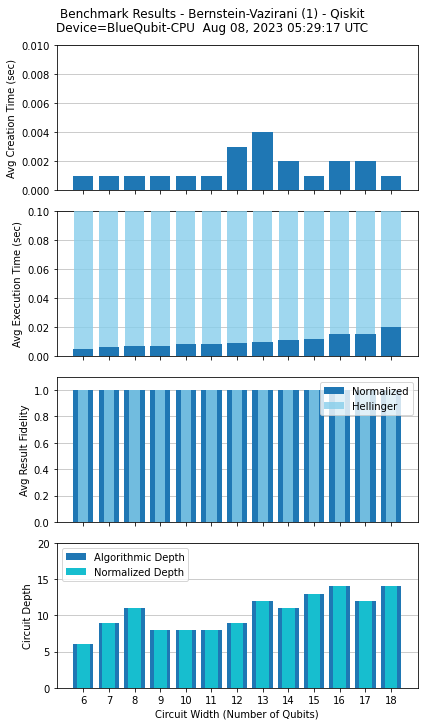

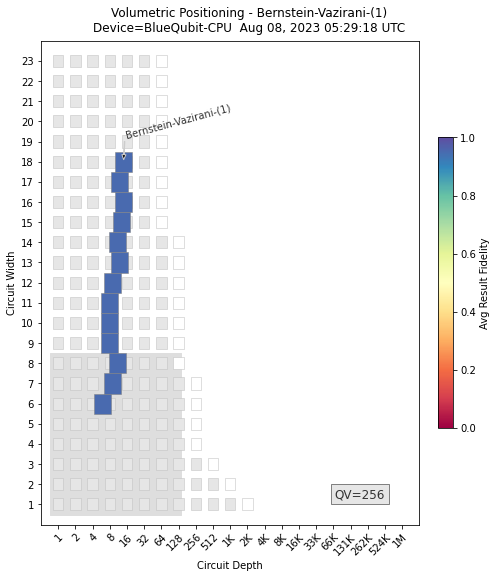

In [8]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 2

In [ ]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hidden Shift

In [ ]:
import sys
sys.path.insert(1, "hidden-shift/qiskit")
import hs_benchmark
hs_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 1

Quantum Fourier Transform Benchmark Program - Qiskit
... using circuit method 1
... execution starting at Aug 08, 2023 05:29:27 UTC
************
Executing [1] circuits with num_qubits = 6


BQ-PYTHON-SDK - INFO - Submitted: Job ID: sHWHfbagIHCBL0pv, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:27 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6
INFO:bluequbit-python-sdk:Submitted: Job ID: sHWHfbagIHCBL0pv, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:27 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 6


... number of gates, depth = 58, 44
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 45, 0.577
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 122, 0.39, 60.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.003, 0.532, 0.016 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 7


BQ-PYTHON-SDK - INFO - Submitted: Job ID: Zmg8BcDRLmS9aYbH, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:27 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7
INFO:bluequbit-python-sdk:Submitted: Job ID: Zmg8BcDRLmS9aYbH, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:27 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 7


... number of gates, depth = 72, 58
************
Average Circuit Algorithmic Depth, ξ (xi) for the 7 qubit group = 59, 0.646
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 7 qubit group = 163, 0.41, 84.0
Average Creation, Elapsed, Execution Time for the 7 qubit group = 0.013, 0.52, 0.02 secs
Average Hellinger, Normalized Fidelity for the 7 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 8


BQ-PYTHON-SDK - INFO - Submitted: Job ID: d3EouzvVF7bWOPpY, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:28 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8
INFO:bluequbit-python-sdk:Submitted: Job ID: d3EouzvVF7bWOPpY, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:28 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 8


... number of gates, depth = 93, 74
************
Average Circuit Algorithmic Depth, ξ (xi) for the 8 qubit group = 75, 0.659
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 8 qubit group = 210, 0.416, 112.0
Average Creation, Elapsed, Execution Time for the 8 qubit group = 0.015, 0.632, 0.025 secs
Average Hellinger, Normalized Fidelity for the 8 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 9


BQ-PYTHON-SDK - INFO - Submitted: Job ID: cXl73gkSQDfDczzr, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 9
INFO:bluequbit-python-sdk:Submitted: Job ID: cXl73gkSQDfDczzr, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 9


... number of gates, depth = 113, 92
************
Average Circuit Algorithmic Depth, ξ (xi) for the 9 qubit group = 93, 0.692
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 9 qubit group = 263, 0.426, 144.0
Average Creation, Elapsed, Execution Time for the 9 qubit group = 0.004, 0.667, 0.032 secs
Average Hellinger, Normalized Fidelity for the 9 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 10


BQ-PYTHON-SDK - INFO - Submitted: Job ID: loP7pRNQYFTFpuu1, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 10
INFO:bluequbit-python-sdk:Submitted: Job ID: loP7pRNQYFTFpuu1, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 10


... number of gates, depth = 138, 112
************
Average Circuit Algorithmic Depth, ξ (xi) for the 10 qubit group = 113, 0.703
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 10 qubit group = 322, 0.431, 180.0
Average Creation, Elapsed, Execution Time for the 10 qubit group = 0.082, 0.77, 0.039 secs
Average Hellinger, Normalized Fidelity for the 10 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 11


BQ-PYTHON-SDK - INFO - Submitted: Job ID: CkpiTRIM8GxaZKVh, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:30 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 11
INFO:bluequbit-python-sdk:Submitted: Job ID: CkpiTRIM8GxaZKVh, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:30 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 11


... number of gates, depth = 160, 134
************
Average Circuit Algorithmic Depth, ξ (xi) for the 11 qubit group = 135, 0.738
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 11 qubit group = 387, 0.439, 220.0
Average Creation, Elapsed, Execution Time for the 11 qubit group = 0.02, 1.919, 0.045 secs
Average Hellinger, Normalized Fidelity for the 11 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 12


BQ-PYTHON-SDK - INFO - Submitted: Job ID: 1CKZmk54sa22xEx3, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:32 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 12
INFO:bluequbit-python-sdk:Submitted: Job ID: 1CKZmk54sa22xEx3, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:32 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 12


... number of gates, depth = 184, 158
************
Average Circuit Algorithmic Depth, ξ (xi) for the 12 qubit group = 159, 0.767
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 12 qubit group = 458, 0.446, 264.0
Average Creation, Elapsed, Execution Time for the 12 qubit group = 0.02, 2.015, 0.052 secs
Average Hellinger, Normalized Fidelity for the 12 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 13


BQ-PYTHON-SDK - INFO - Submitted: Job ID: Qy9VpiDtI1e9Vw1q, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:34 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 13
INFO:bluequbit-python-sdk:Submitted: Job ID: Qy9VpiDtI1e9Vw1q, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:34 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 13


... number of gates, depth = 212, 184
************
Average Circuit Algorithmic Depth, ξ (xi) for the 13 qubit group = 185, 0.784
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 13 qubit group = 535, 0.45, 312.0
Average Creation, Elapsed, Execution Time for the 13 qubit group = 0.009, 2.216, 0.061 secs
Average Hellinger, Normalized Fidelity for the 13 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 14


BQ-PYTHON-SDK - INFO - Submitted: Job ID: ZgOzvhTKLZZ43O5V, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:37 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 14
INFO:bluequbit-python-sdk:Submitted: Job ID: ZgOzvhTKLZZ43O5V, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:37 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 14


... number of gates, depth = 244, 212
************
Average Circuit Algorithmic Depth, ξ (xi) for the 14 qubit group = 213, 0.791
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 14 qubit group = 618, 0.453, 364.0
Average Creation, Elapsed, Execution Time for the 14 qubit group = 0.009, 2.256, 0.073 secs
Average Hellinger, Normalized Fidelity for the 14 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 15


BQ-PYTHON-SDK - INFO - Submitted: Job ID: DKDKnEZAYelIgr2c, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:39 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 15
INFO:bluequbit-python-sdk:Submitted: Job ID: DKDKnEZAYelIgr2c, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:39 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 15


... number of gates, depth = 280, 242
************
Average Circuit Algorithmic Depth, ξ (xi) for the 15 qubit group = 243, 0.792
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 15 qubit group = 707, 0.454, 420.0
Average Creation, Elapsed, Execution Time for the 15 qubit group = 0.011, 2.341, 0.085 secs
Average Hellinger, Normalized Fidelity for the 15 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 16


BQ-PYTHON-SDK - INFO - Submitted: Job ID: kN9yadUxDvPlf56N, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:42 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 16
INFO:bluequbit-python-sdk:Submitted: Job ID: kN9yadUxDvPlf56N, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:42 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 16


... number of gates, depth = 311, 274
************
Average Circuit Algorithmic Depth, ξ (xi) for the 16 qubit group = 275, 0.814
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 16 qubit group = 802, 0.458, 480.0
Average Creation, Elapsed, Execution Time for the 16 qubit group = 0.012, 2.419, 0.096 secs
Average Hellinger, Normalized Fidelity for the 16 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 17


BQ-PYTHON-SDK - INFO - Submitted: Job ID: KfwGbDKlNDTccLGN, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 17
INFO:bluequbit-python-sdk:Submitted: Job ID: KfwGbDKlNDTccLGN, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:44 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 17


... number of gates, depth = 348, 308
************
Average Circuit Algorithmic Depth, ξ (xi) for the 17 qubit group = 309, 0.822
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 17 qubit group = 903, 0.461, 544.0
Average Creation, Elapsed, Execution Time for the 17 qubit group = 0.066, 2.582, 0.113 secs
Average Hellinger, Normalized Fidelity for the 17 qubit group = 1.0, 1.0

************
Executing [1] circuits with num_qubits = 18


BQ-PYTHON-SDK - INFO - Submitted: Job ID: dO0naofoDiAG0zKL, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:48 UTC, estimated runtime: 163 ms, estimated cost: $0.00, num qubits: 18
INFO:bluequbit-python-sdk:Submitted: Job ID: dO0naofoDiAG0zKL, device: cpu, run status: RUNNING, created on: 2023-08-08 05:29:48 UTC, estimated runtime: 163 ms, estimated cost: $0.00, num qubits: 18


... number of gates, depth = 385, 344
************
Average Circuit Algorithmic Depth, ξ (xi) for the 18 qubit group = 345, 0.834
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 18 qubit group = 1010, 0.463, 612.0
Average Creation, Elapsed, Execution Time for the 18 qubit group = 0.015, 3.478, 0.141 secs
Average Hellinger, Normalized Fidelity for the 18 qubit group = 1.0, 1.0

... execution complete at Aug 08, 2023 05:29:50 UTC in 22.975 secs

Sample Circuit:
        ┌───┐ ░ ┌──────┐ ░  ┌───────┐   ░ ┌──────────┐ ░ ┌─┐               
q328_0: ┤ X ├─░─┤0     ├─░──┤ Rz(π) ├───░─┤0         ├─░─┤M├───────────────
        └───┘ ░ │      │ ░ ┌┴───────┴┐  ░ │          │ ░ └╥┘┌─┐            
q328_1: ──────░─┤1     ├─░─┤ Rz(π/2) ├──░─┤1         ├─░──╫─┤M├────────────
        ┌───┐ ░ │      │ ░ ├─────────┤  ░ │          │ ░  ║ └╥┘┌─┐         
q328_2: ┤ X ├─░─┤2     ├─░─┤ Rz(π/4) ├──░─┤2         ├─░──╫──╫─┤M├─────────
        ├───┤ ░ │  qft │ ░ ├─────────┤  ░ │  inv_qft │ ░  ║  ║ └╥┘┌

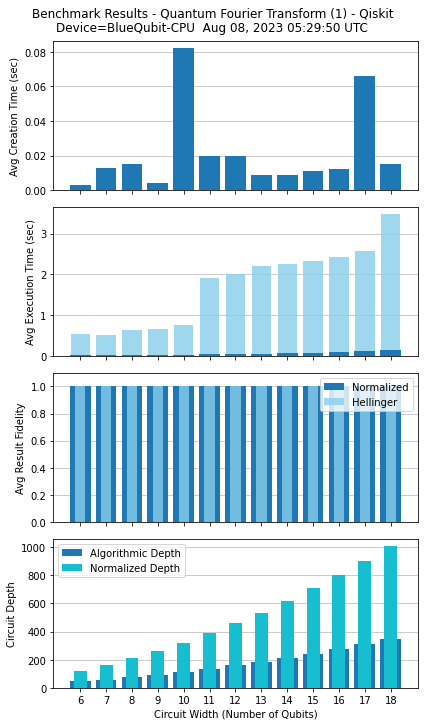

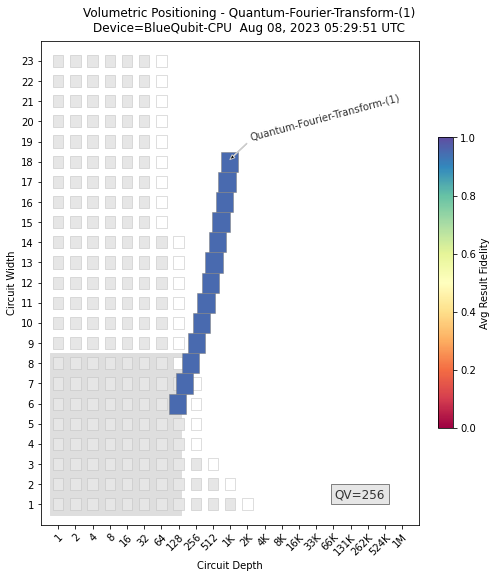

In [9]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 2

In [ ]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Grover

In [ ]:
import sys
sys.path.insert(1, "grovers/qiskit")
import grovers_benchmark
grovers_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Phase Estimation

In [ ]:
import sys
sys.path.insert(1, "phase-estimation/qiskit")
import pe_benchmark
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### HHL Linear Solver

In [ ]:
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Amplitude Estimation

In [ ]:
import sys
sys.path.insert(1, "amplitude-estimation/qiskit")
import ae_benchmark
ae_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Monte Carlo

In [ ]:
import sys
sys.path.insert(1, "monte-carlo/qiskit")
import mc_benchmark
mc_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation

In [ ]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qiskit")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### VQE - Method 1

In [ ]:
import sys
sys.path.insert(1, "vqe/qiskit")
import vqe_benchmark
vqe_num_shots=4098
vqe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=vqe_num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 1

In [ ]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 2

In [ ]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Combined Benchmark Results

In [ ]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 64
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)